#**Interacting with HTML and Web APIs**

## Web Scrapping

###Introduction

What is web scraping?

Web Scraping is an amazing technique wherein you can get data from the internet just by typing a few lines of code.

We all know that all the data that is present in any website is simple HTML format data. Web scraping technique uses this HTML format data to extract information from the website and present it to the website. To Extract data from the website, we would be using beautifulSoup. BeautfiulSoup is a powerful Python library that helps to extract data from static HTML websites and stores it inside an object. We can then use this object to extract data

In [ ]:
#imports BeautifulSoup in your IDE or machine.
from bs4 import BeautifulSoup

Now since we are extracting data from a website, we need to hit that URL with a get request to get data. To do this we need the **request** library. To install the request library, just type the below command.

In [ ]:

import requests as request

Now that we imported both our libraries, let’s hit that URL and store the content of the page in the object.

###Getting Started With Web Scraping

In [ ]:
pageContent = request.get("https://www.worldometers.info/coronavirus/")

Now, we will store this content in a beautifulSoup object. We need to tell beautifulSoup that this is HTML document content and we are storing it in an object. This allows us to use the functions of Web scraping provided by BeautifulSoup.

In [ ]:
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')

This stores the content of ContentPage in the beautifulSoupObject. The “html.parser” tells the beautifulSoupObjbect to parse this page content as HTML text. Let’s try to print it now.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
print(beautifulSoupObject)

The above output does not look pretty at all, and one cannot figure out what it means. Fortunately, you can prettify the data using .prettify() function of beautifulSoupObject. Just type beautifulSoupObject.prettify() and now print the data.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
print(beautifulSoupObject.prettify())

The output looks pretty now. It’s clean and one can figure out something from this data as well.

###Scraping the text Content From Website

The next thing we need to do is scrape the data. Let’s head over to the website.

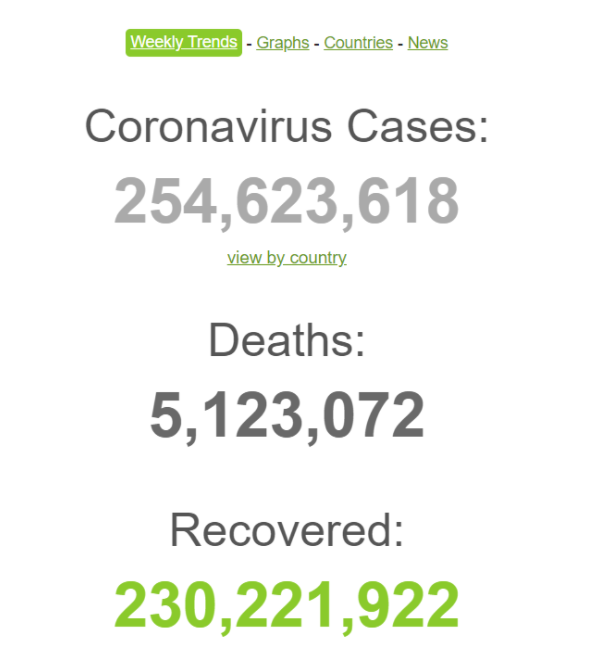

Now we can see the data we need to scrap. Right-click the mouse and click on Inspect Element.

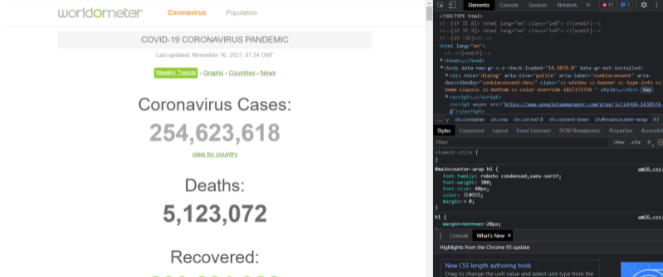

Now click on the arrow icon on the top left of Inspect Element box.

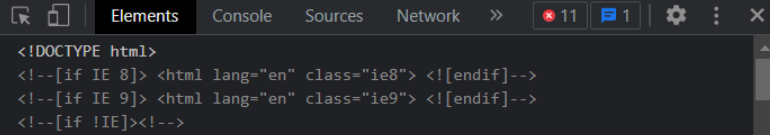

Click the top-left button. This will enable the HTML selection button. Now select the data on the page which you want to extract. In my case, I want to extract the total number of cases in the world.

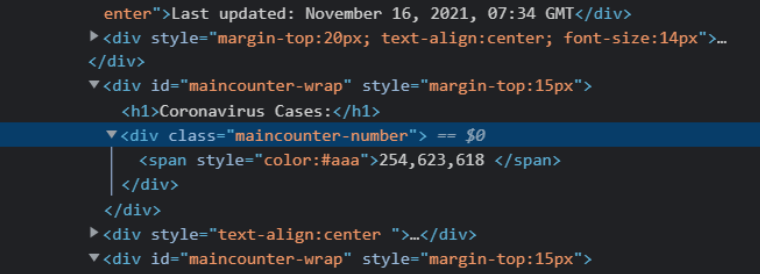

The selected HTML element tells me that there is a div with class “maincounter-number” which contains my data. Let’s try to extract the data from beautifulSoupObject. The find_all() function is a great function that helps to extract all HTML element that contains a given value. It takes an HTML element along with some attributes that tell it which class and id of div we need to select. Here it is visible that I need a div element with a class attribute of maincounter-number. Now let’s search it. We will store the result in a new Variable called mainCounterDiv.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
 
mainCounterDiv=beautifulSoupObject.find_all('div', attrs={"class":"maincounter-number"})
print(mainCounterDiv)

It provides us with a list of HTML elements. Now if we look at website data and mainCounterDiv data we can see that the first data of List is the number of Total Cases of Covid-19, the second data is the number of deaths that have occurred and the third data contains the value of total recovered cases. One problem is that the find function is returning the List of HTML elements, however, we need the text, so what to do. We can use the get_text() method of BeautifulSoup. It gets the data that is inside the HTML element rather than getting the whole HTML element, We will now create three variables and store text HTML elements in them. Let’s see how to do that.


In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
 
mainCounterDiv=beautifulSoupObject.find_all('div', attrs={"class":"maincounter-number"})
totalCases,totalDeaths,totalRecovered= mainCounterDiv[0].get_text().strip(), mainCounterDiv[1].get_text().strip(), mainCounterDiv[2].get_text().strip()
print(totalCases)
print(totalDeaths)
print(totalRecovered)

We have used .strip() function as well. This will help to remove any whitespace (if exists) in the HTML element. Upon printing these variables we will get these values.

###Scraping Table using BeautifulSoup

Now let us upgrade the task a little bit. Scrolling down the web page, you can see that there is a table, let us try to scrape that.

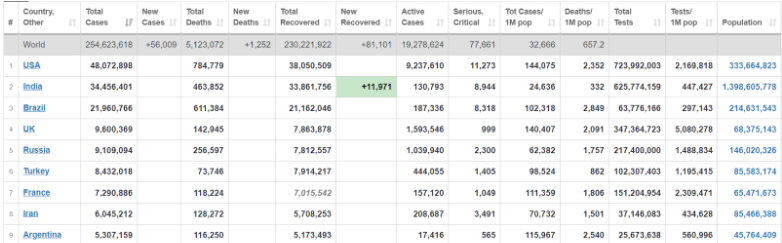

BeautifulSoup has an inbuilt function that allows the user to select an element just by specifying the element name. For example, let’s say that you want to scrape a table. Then you can simply type table in front of beauftifulSoupObject and it will get you the table.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table #get table on the page
print(mainTable)

Now we have the table in front of us. Let us try to scrape the data from the table. We need rows and the body of the table for getting all the data. We will now scrape the mainTable content for heading rows and columns. Our table is now divided into two parts. The headings are denoted as tr and the rest is inside the tbody. Once we get the tbody, we need to extract all the tr present in tbody.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
 
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")

Printing the row will get us a list of all tr present in tbody as List.

Now we have the data but we need this in a list form. We can see that the contains many td. We will now find all td in the heading and store them in a List.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
print(mainHeading)

Now we will iterate the list and get all text data using the get_text() function. Then we will store these data in another text using another List.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
headingList=[]
for ele in mainHeading:
  headingList.append(ele.get_text().strip())
print(headingList)

Good, now we all heading to the table. Next, we will move on to the rows. The row variable in our code is a list that contains all the rows in the tbody. These rows in turn contain several table data in td elements. Now our work is to get all these data in the list. Now what we will do is we will iterate over row List. Now in each tr element in a row, we will find all td elements and store them in a list. Then we will iterate over the tdList and then store all the td data in a list. This way we will have a list of list containing all the data in the table.

In [ ]:
from bs4 import BeautifulSoup
import requests as request
pageContent = request.get("https://www.worldometers.info/coronavirus/")
beautifulSoupObject = BeautifulSoup(pageContent.content,'html.parser')
mainTable = beautifulSoupObject.table
heading = mainTable.tr
body = mainTable.tbody
row = body.find_all("tr")
mainHeading = heading.find_all("th")
headingList=[]
for ele in mainHeading:
  headingList.append(ele.get_text().strip())
tableDataList = []
for ele in row:
  tdList = ele.find_all("td")
  tempList = []
  for data in tdList:
    tempList.append(data.get_text().strip())
  tableDataList.append(tempList)
print(tableDataList)

Upon printing tableDataList we will get the list of the list containing all the table data. Congratulations now, we have table heading and table data as well.

## Exercise 1: Scrapping wikipedia Article Using Requests Library and Python

In [ ]:
import requests

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
print(response.status_code)

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.string)

In [ ]:
import requests
from bs4 import BeautifulSoup
import random

response = requests.get(
	url="https://en.wikipedia.org/wiki/Web_scraping",
)
soup = BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.content)

# Get all the links
allLinks = soup.find(id="bodyContent").find_all("a")
random.shuffle(allLinks)
linkToScrape = 0

for link in allLinks:
	# We are only interested in other wiki articles
	if link['href'].find("/wiki/") == -1: 
		continue

	# Use this link to scrape
	linkToScrape = link
	break

print(linkToScrape)

In [ ]:
import requests
from bs4 import BeautifulSoup
import random

def scrapeWikiArticle(url):
	response = requests.get(
		url=url,
	)
	
	soup = BeautifulSoup(response.content, 'html.parser')

	title = soup.find(id="firstHeading")
	print(title.text)

	allLinks = soup.find(id="bodyContent").find_all("a")
	random.shuffle(allLinks)
	linkToScrape = 0

	for link in allLinks:
		# We are only interested in other wiki articles
		if link['href'].find("/wiki/") == -1: 
			continue

		# Use this link to scrape
		linkToScrape = link
		break

	scrapeWikiArticle("https://en.wikipedia.org" + linkToScrape['href'])

scrapeWikiArticle("https://en.wikipedia.org/wiki/Web_scraping")

#Introduction to Simple Web Applications with Flask

##Creating a Flask app that serves HTML

**create a basic Flask app**

We'll start off with a boilerplate, one-file Flask app, i.e. just app.py. We won't worry yet about making multiple pages or multiple file.

See if you can create the boilerplate from memory:





##Creating Multiple Routes and Dynamic Content in Flask

##Making a simple Flask app for viewing YouTube videos